# Exploring alcohol-related content on Twitter

In [1]:
import json
import pandas as pd
from langdetect import detect
import networkx as nx

tweets = []
for line in open('twitter-@alcohol.json', 'r'):
    tweets.append(json.loads(line))

twitter_content = []
twitter_user = []
twitter_reply = []
twitter_likes = []

for tweet in tweets:
    try:
        if detect(tweet["content"]) == "en":
            lang = "en"
            twitter_content.append(tweet["content"])
            twitter_user.append(tweet["user"]["id"])
            twitter_reply.append(tweet["replyCount"])
            twitter_likes.append(tweet["likeCount"])
    except:
        lang = 'no'

In [2]:
data = pd.DataFrame()
data["content"] = twitter_content
data["user_id"] = twitter_user
data["reply"] = twitter_reply
data["likes"] = twitter_likes
data

,content,user_id,reply,likes
0,"Herb is the healing of a nation, alcohol is th...",1402891740579647488,0,0
1,You can tell the alcohol has sunken in when I ...,1129409314744131584,0,0
2,@Arditi_d_Popolo When I moved to PA in 1988 I ...,36638787,2,6
3,@stabbymcdanger @finalgirlhannah Iris has actu...,414229646,1,1
4,If my job was to tell me they weren't drug tes...,2868500374,0,4
...,...,...,...,...
386286,Alcohol is not the answer it just makes you fo...,102350304,0,2
386287,@Hopewell_Viking students learn about how alco...,66255160,0,0
386288,"it's been so long since i got home at 1am, and...",1376599725500157954,0,2
386289,@RealSpikeCohen @IndisputableTYT @Rashad_Riche...,780899835364777984,1,1


In [3]:
data.describe()

,user_id,reply,likes
count,3.862910e+05,386291.000000,386291.000000
mean,6.846937e+17,1.006257,12.225444
std,6.375866e+17,29.139502,637.392592
min,6.490000e+02,0.000000,0.000000
25%,6.178539e+08,0.000000,0.000000
50%,8.519598e+17,0.000000,1.000000
75%,1.326845e+18,1.000000,2.000000
max,1.520510e+18,14011.000000,258123.000000


In [4]:
data["user_id"].value_counts()

617853906              10343
405259565               1367
776442371038781441       423
1311421252133847041      374
3364071537               238
                       ...  
611326804                  1
158752864                  1
1208020120934764545        1
12356582                   1
780899835364777984         1
Name: user_id, Length: 278540, dtype: int64

In [5]:
data = data.drop(data[data.user_id == 405259565].index)
data = data.drop(data[data.user_id == 617853906].index)
data

,content,user_id,reply,likes
0,"Herb is the healing of a nation, alcohol is th...",1402891740579647488,0,0
1,You can tell the alcohol has sunken in when I ...,1129409314744131584,0,0
2,@Arditi_d_Popolo When I moved to PA in 1988 I ...,36638787,2,6
3,@stabbymcdanger @finalgirlhannah Iris has actu...,414229646,1,1
4,If my job was to tell me they weren't drug tes...,2868500374,0,4
...,...,...,...,...
386286,Alcohol is not the answer it just makes you fo...,102350304,0,2
386287,@Hopewell_Viking students learn about how alco...,66255160,0,0
386288,"it's been so long since i got home at 1am, and...",1376599725500157954,0,2
386289,@RealSpikeCohen @IndisputableTYT @Rashad_Riche...,780899835364777984,1,1


remove stopwords

In [6]:
from nltk.corpus import stopwords
from nltk.tokenize.casual import TweetTokenizer
import string

STOP_PREFIXES = ("@", "http", "&amp")

def clean_text(comment):
    comment = comment.replace("\n", " ")
    comment = comment.lower()
    words = []

    for word in TweetTokenizer().tokenize(comment):
        if word:
            if word.isalpha() and word not in list(string.punctuation) and word not in stopwords.words("english") and not word.startswith(STOP_PREFIXES) and word != "’":
                words.append(word)
    
    return (" ").join(words)

data["content"] = data["content"].apply(clean_text)
data

,content,user_id,reply,likes
0,herb healing nation alcohol destruction munawa...,1402891740579647488,0,0
1,tell alcohol sunken start smiling big outta,1129409314744131584,0,0
2,moved pa tried explain packie new college frie...,36638787,2,6
3,iris actually sparsely used decade far wedding...,414229646,1,1
4,job tell drug testing weed anymore never touch...,2868500374,0,4
...,...,...,...,...
386286,alcohol answer makes forget question,102350304,0,2
386287,students learn alcohol impairment impacts visi...,66255160,0,0
386288,long since got home even longer since zero alc...,1376599725500157954,0,2
386289,amazing segment struggle ptsd decade issues al...,780899835364777984,1,1


Text(0.5, 1.0, 'Twitter')

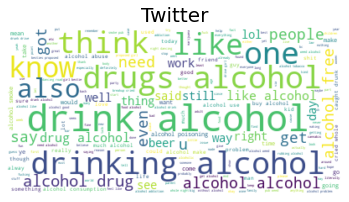

In [7]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

words = " ".join(data["content"].values)
word_cloud = WordCloud(stopwords=stopwords.words("english"), background_color="white").generate(words)
plt.imshow(word_cloud, interpolation="bilinear")
plt.axis("off")
plt.title("Twitter", size=20)

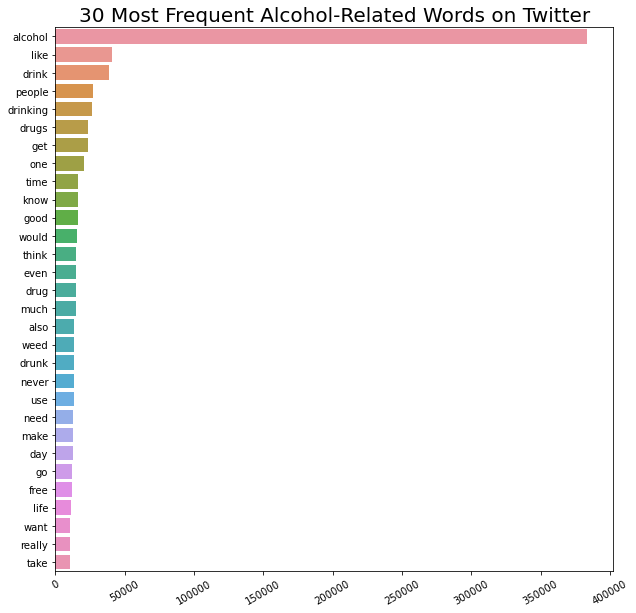

In [8]:
from nltk.probability import FreqDist

freq = FreqDist(words.split(" "))

all_fdist = pd.Series(dict(freq.most_common(30)))
fig, ax = plt.subplots(figsize=(10,10))
all_plot = sns.barplot(y=all_fdist.index, x=all_fdist.values, ax=ax)
plt.xticks(rotation=30)
plt.title("30 Most Frequent Alcohol-Related Words on Twitter", size=20)
plt.show()

freq_words = list(freq)[:56]

In [9]:
print("The most frequent 30 words: {}".format(freq_words))

The most frequent 30 words: ['alcohol', 'like', 'drink', 'people', 'drinking', 'drugs', 'get', 'one', 'time', 'know', 'good', 'would', 'think', 'even', 'drug', 'much', 'also', 'weed', 'drunk', 'never', 'use', 'need', 'make', 'day', 'go', 'free', 'life', 'want', 'really', 'take', 'still', 'way', 'night', 'work', 'got', 'girl', 'years', 'going', 'say', 'well', 'see', 'food', 'many', 'could', 'bad', 'smoke', 'feel', 'love', 'every', 'water', 'without', 'things', 'us', 'back', 'beer', 'abuse']


In [10]:
from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

def find_positive(comment):
    return sia.polarity_scores(comment)["pos"]

def find_neutral(comment):
    return sia.polarity_scores(comment)["neu"]

def find_negative(comment):
    return sia.polarity_scores(comment)["neg"]

def find_compound(comment):
    return sia.polarity_scores(comment)["compound"]

data["Positive"] = data["content"].apply(find_positive)
data["Neutral"] = data["content"].apply(find_neutral)
data["Negative"] = data["content"].apply(find_negative)
data["Compound"] = data["content"].apply(find_compound)
data

,content,user_id,reply,likes,Positive,Neutral,Negative,Compound
0,herb healing nation alcohol destruction munawa...,1402891740579647488,0,0,0.304,0.400,0.296,0.0258
1,tell alcohol sunken start smiling big outta,1129409314744131584,0,0,0.333,0.667,0.000,0.4588
2,moved pa tried explain packie new college frie...,36638787,2,6,0.140,0.860,0.000,0.4767
3,iris actually sparsely used decade far wedding...,414229646,1,1,0.085,0.814,0.101,-0.1280
4,job tell drug testing weed anymore never touch...,2868500374,0,4,0.000,1.000,0.000,0.0000
...,...,...,...,...,...,...,...,...
386286,alcohol answer makes forget question,102350304,0,2,0.000,0.678,0.322,-0.2263
386287,students learn alcohol impairment impacts visi...,66255160,0,0,0.093,0.787,0.120,-0.1531
386288,long since got home even longer since zero alc...,1376599725500157954,0,2,0.000,1.000,0.000,0.0000
386289,amazing segment struggle ptsd decade issues al...,780899835364777984,1,1,0.123,0.453,0.424,-0.8519


In [11]:
print("The mean positive sentiment score: {} ({})".format(round(data["Positive"].mean(), 3), round(data["Positive"].std(), 3)))
print("The mean negative sentiment score: {} ({})".format(round(data["Negative"].mean(), 3), round(data["Negative"].std(), 3)))
print("The mean neutral sentiment score: {} ({})".format(round(data["Neutral"].mean(), 3), round(data["Neutral"].std(), 3)))
print("The mean compound sentiment score: {} ({})".format(round(data["Compound"].mean(), 3), round(data["Compound"].std(), 3)))

The mean positive sentiment score: 0.168 (0.183)
The mean negative sentiment score: 0.138 (0.174)
The mean neutral sentiment score: 0.693 (0.22)
The mean compound sentiment score: 0.039 (0.486)


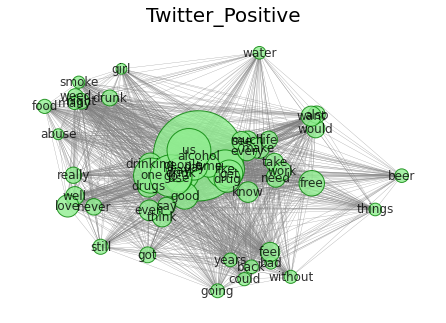

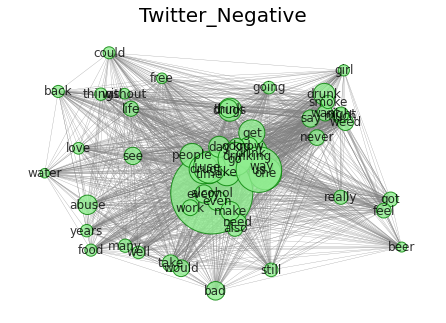

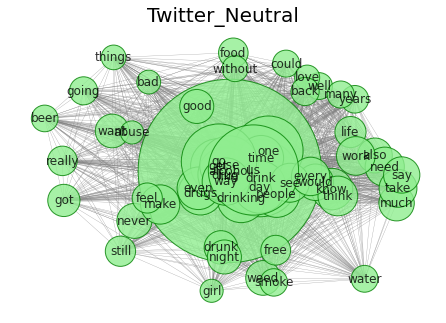

/Users/yujiachen/opt/anaconda3/lib/python3.9/site-packages/matplotlib/collections.py:982: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


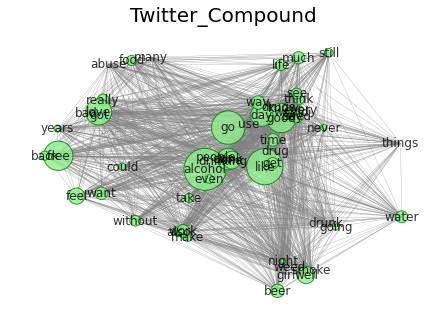

In [12]:
def word_freq(content, word1, word2):
    if word1 in content and word2 in content:
        return 1
    else:
        return 0

def word_sent(content, sentiment, word):
    if word in content:
        return sentiment
    else:
        return 0

positive_scores = {}
neutral_scores = {}
negative_scores = {}
compound_scores = {}

graph1 = nx.Graph()
sentiment_sim_lst = []

checked_lst = []

for word1 in freq_words:
    
    positive_scores[word1] = data.apply(lambda x: word_sent(x["content"], x["Positive"], word1), axis=1).mean() * 50000
    neutral_scores[word1] = data.apply(lambda x: word_sent(x["content"], x["Neutral"], word1), axis=1).mean() * 50000
    negative_scores[word1] = data.apply(lambda x: word_sent(x["content"], x["Negative"], word1), axis=1).mean() * 50000
    compound_scores[word1] = data.apply(lambda x: word_sent(x["content"], x["Compound"], word1), axis=1).mean() * 50000

    if checked_lst:
        for word2 in checked_lst:
            tie = data.apply(lambda x: word_freq(x["content"], word1, word2), axis=1).sum()

            graph1.add_edge(word1, word2, weight=tie)
            sentiment_sim_lst.append([word1, word2, tie])
    
    checked_lst.append(word1)


nx.draw(graph1, nodelist=list(positive_scores.keys()), node_size=list(positive_scores.values()), with_labels=True,
node_color="lightgreen", width=0.3, edge_color="gray", edgecolors="green", alpha=0.8)
plt.title("Twitter_Positive", size=20)
plt.show()

nx.draw(graph1, nodelist=list(negative_scores.keys()), node_size=list(negative_scores.values()), with_labels=True,
node_color="lightgreen", width=0.3, edge_color="gray", edgecolors="green", alpha=0.8)
plt.title("Twitter_Negative", size=20)
plt.show()

nx.draw(graph1, nodelist=list(neutral_scores.keys()), node_size=list(neutral_scores.values()), with_labels=True,
node_color="lightgreen", width=0.3, edge_color="gray", edgecolors="green", alpha=0.8)
plt.title("Twitter_Neutral", size=20)
plt.show()

nx.draw(graph1, nodelist=list(compound_scores.keys()), node_size=list(compound_scores.values()), with_labels=True,
node_color="lightgreen", width=0.3, edge_color="gray", edgecolors="green", alpha=0.8)
plt.title("Twitter_Compound", size=20)
plt.show()